9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Customer ratio')

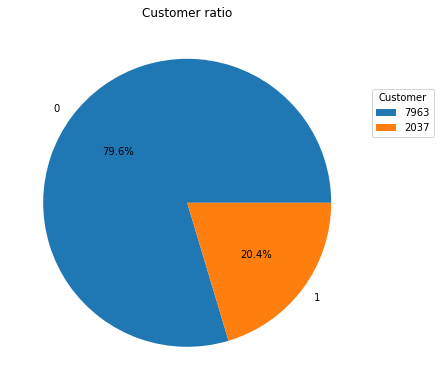

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

churn_data = pd.read_csv('churn.csv')

ratio_clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio_clients,
    labels=ratio_clients.index,
    autopct='%.1f%%'    
)
axes.legend(ratio_clients,
            title = 'Customer',
            loc = 'center left',
            bbox_to_anchor=(1, 0, 0.5, 1.5))

axes.set_title('Customer ratio')

По данной круговой диаграмме можно сделать вывод, что клиенты в целом удовлетворены банком, поскольку 79,6% остаются в числе лояльных клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Number of customer')

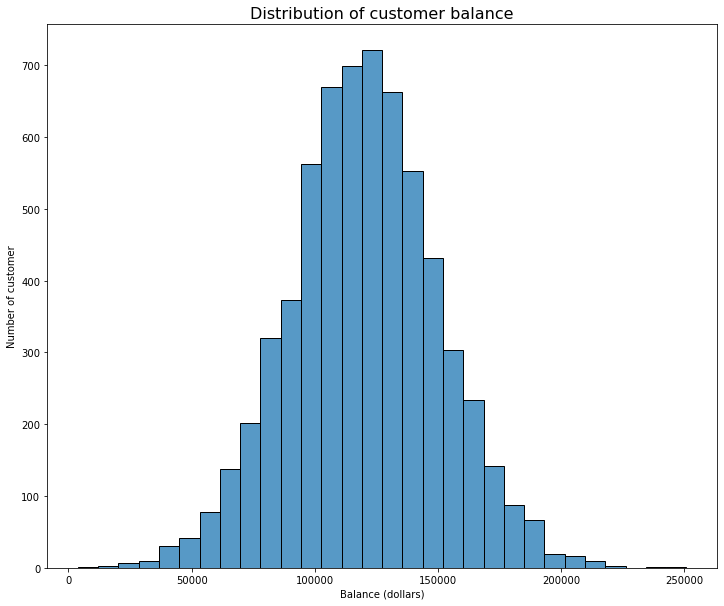

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

churn_data = pd.read_csv('churn.csv')

fig, axes = plt.subplots(figsize=(12, 10))


histplot1 = sns.histplot(
    data=churn_data[churn_data.Balance > 2500], 
    x='Balance', 
    bins=30
)
histplot1.set_title('Distribution of customer balance', fontsize=16)
histplot1.set_xlabel('Balance (dollars)')
histplot1.set_ylabel('Number of customer')

Исходя из графика распределения баланса пользователей, на счету которых больше 2500 долларов, можно сделать вывод, что в среднем у самого большего количества клиентов на счете лежит сумма около 125000 долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

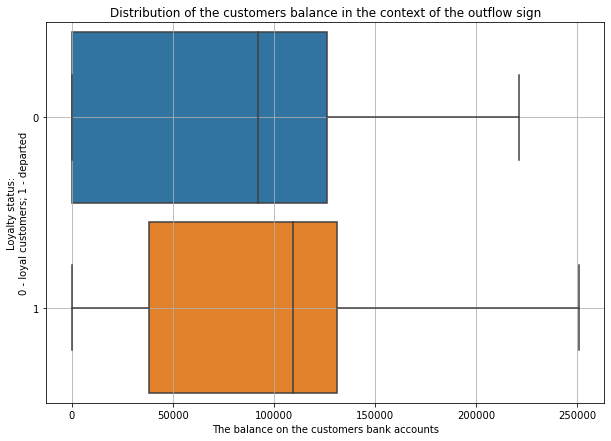

In [3]:
import seaborn as sns

fig = plt.figure(figsize=(10, 7))

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Distribution of the customers balance in the context of the outflow sign')
boxplot.set_xlabel('The balance on the customers bank accounts')
boxplot.set_ylabel('Loyalty status:\n0 - loyal customers; 1 - departed')
boxplot.grid()

Исходя из диаграммы распределение баланса клиента в разрезе признака оттока можно сделать вывод, что медианное значение баланса у ушедших клиентов больше, чем у лояльных. Диапазон разброса баланса на счете больше у ушедших клиентов, но ширина "коробки с усами" больше у лояльных клиентов. Правые границы почти совпадают, это означает, что в среднем баланс у 75% лояльных клиентов немного ниже, чем у 75% ушедших клиентов. На мой взгляд, ушидшие клиенты недовольны тем, что при достижении определенной суммы  на счете, около 1400000 долларов, счет больше не приносит хорошей прибыли, поэтому клиенты и уходят в другой банк.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
На какую возрастную категорию клиентов стоит обратить внимание банку?

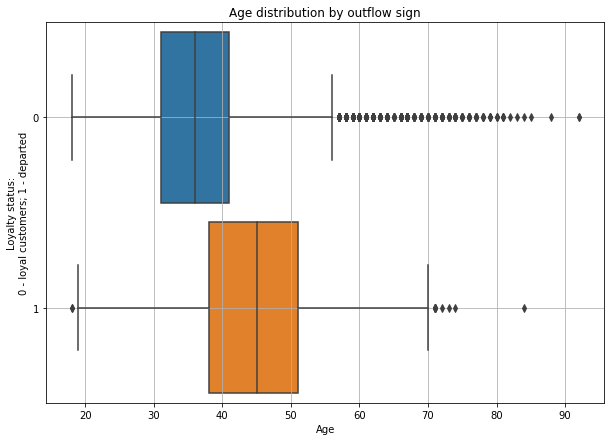

In [4]:
fig = plt.figure(figsize=(10, 7))

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Age distribution by outflow sign')
boxplot.set_xlabel('Age')
boxplot.set_ylabel('Loyalty status:\n0 - loyal customers; 1 - departed')
boxplot.grid()

Судя по диаграмме распределения возраста в разрезе признака оттока больше потенциальных выбросов в группе лояльных клиентов. Выбросы говорят нам о том, что подавляющее большинство клиентов имеют возраст до 60 лет. В среднем возраст лояльных клиентов ниже, чем ушедших клиентов, об этом говорит максимальное значение для лояльных клиентов: 56 лет, в отличие от максимального возраста ушедших клиентов: 70 лет. Исходя из графика можно сделать вывод, что банк с одной стороны может ориентироваться на клиентов среднего и молодого возраста, медианное значение лояльных клиентов 36 лет, причем разброс от медианного значения всего 5 лет. Если сравнивать с прошлой диаграммой, то получается, что у клиентов старшего возраста больший баланс на счету, но они менее заинтересованы в данном банке, если банку важно удерживать клиентов с большим балансом на счете, то стоит обратить на это внимание.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

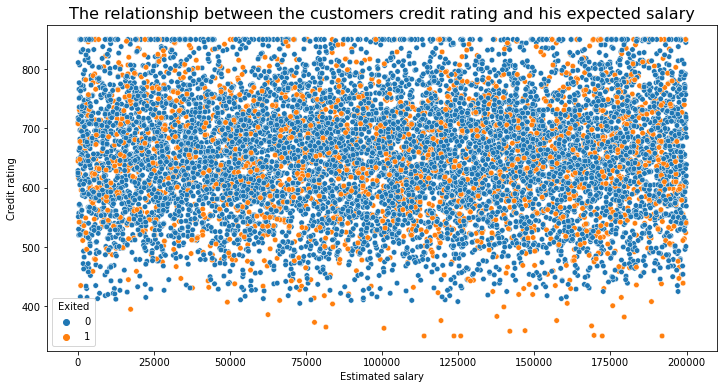

In [5]:
fig = plt.figure(figsize=(12, 6))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=30    
)
scatterplot.set_title('The relationship between the customers credit rating and his expected salary', fontsize=16)
scatterplot.set_xlabel('Estimated salary')
scatterplot.set_ylabel('Credit rating')
plt.show()

Судя по диаграмме рассеяния взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты, можно сделать вывод, что строгой взаимосвязи между этими признаками не наблюдается, добавление признака лояльности в диаграмму также не дало существенных результатов.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
Подсказка: Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited 
(так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

Text(0.5, 1.0, 'Distribution of departed customers by gender')

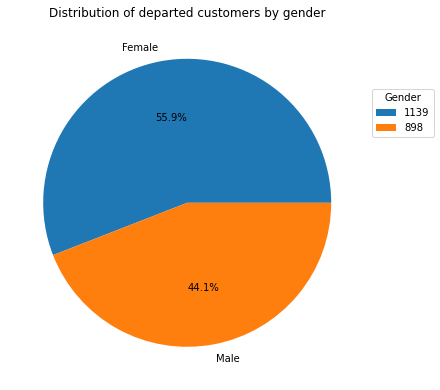

In [7]:
gender_clients = churn_data[churn_data.Exited == 1]
ratio_clients = gender_clients['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio_clients,
    labels=ratio_clients.index,
    autopct='%.1f%%'    
)
axes.legend(ratio_clients,
            title = 'Gender',
            loc = 'center left',
            bbox_to_anchor=(1, 0, 0.5, 1.5))

axes.set_title('Distribution of departed customers by gender')

Исходя из данного графика можно сделать вывод, что чаще банк покидают мужчины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

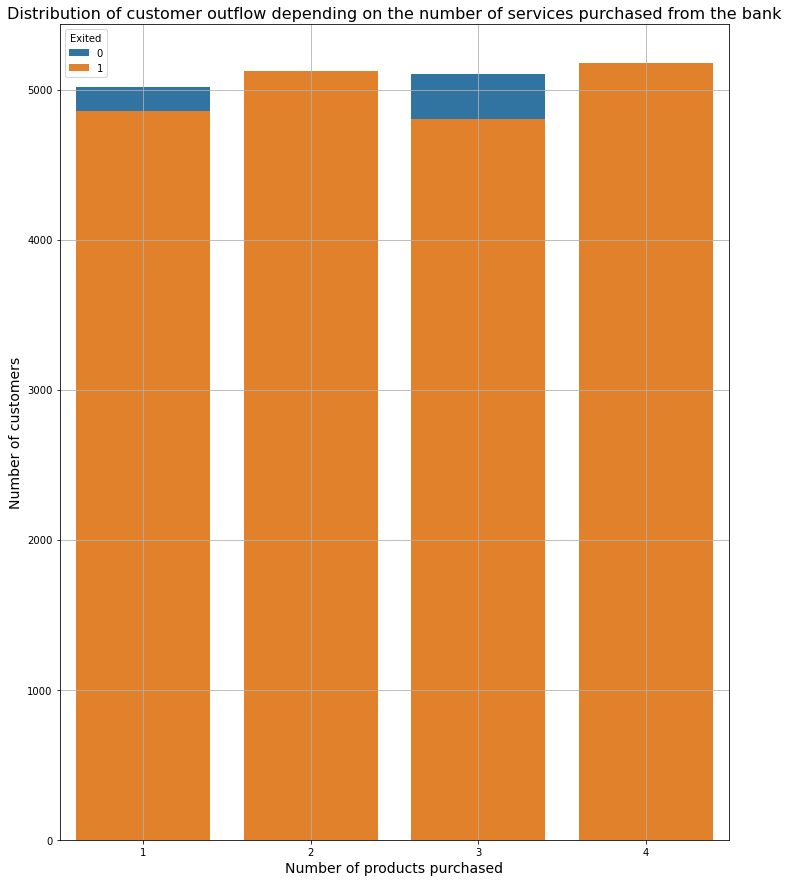

In [16]:
fig, axes = plt.subplots(figsize=(12, 15))
y1 = len(churn_data['CustomerId'].unique())

barplot2 = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='RowNumber',
    hue='Exited',
    orient='v',
    ci=None,
    dodge=False
)
barplot2.set_title('Distribution of customer outflow depending on the number of services purchased from the bank', fontsize=16)
barplot2.set_xlabel('Number of products purchased', fontsize=14)
barplot2.set_ylabel('Number of customers', fontsize=14)
barplot2.grid()




Как видно из диаграммы, наибольшее число лояльных клиентов среди людей, которые пользуются тремя услугами банка, а вот среди клиентов, которые пользуются четыремя услугами банка - больше ушедших клиентов. Это может говорить о том, что есть услуга или часть услуг, которые не устраивают клиентов банка. Также число ушедших клиентов больше и среди клиентов, которые пользуются двумя услугами банка.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

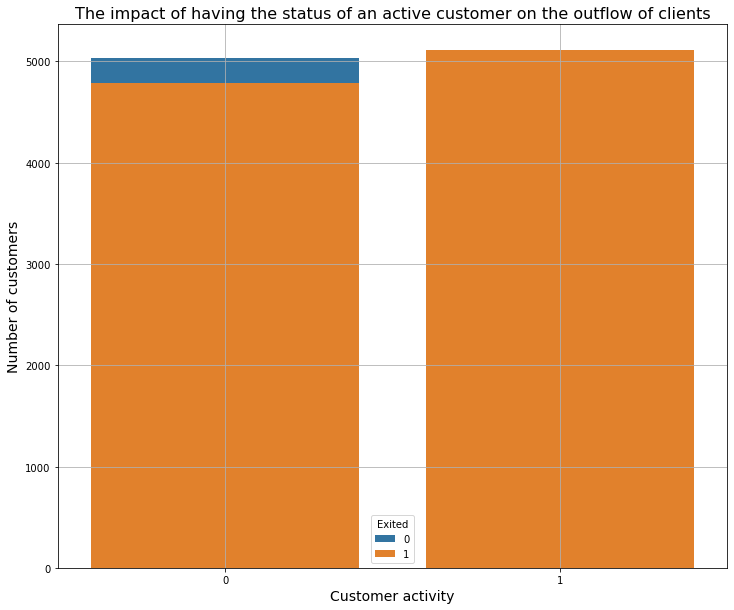

In [12]:
fig, axes = plt.subplots(figsize=(12, 10))

barplot2 = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='RowNumber',
    hue='Exited',
    orient='v',
    ci=None,
    dodge=False
)
#barplot2.tick_params(axis='x', rotation=70)
barplot2.set_title('The impact of having the status of an active customer on the outflow of clients', fontsize=16)
barplot2.set_xlabel('Сustomer activity', fontsize=14)
barplot2.set_ylabel('Number of customers', fontsize=14)
barplot2.grid()

По диаграмме видно, что среди ушедших клиентов банка, больше тех, которые активно пользовались услугами банка, исходя из прошлой диаграммы, можно сделать вывод, что клиенты недовольны некоторыми услугами. Среди неактивных клиентов банка больше лояльных клиентов, поэтому в целом, они довольны услугами банка, чтобы уменьшить отток клиентов, на мой взгляд, нужно доработать услуги, которыми недовольны клиенты. Следует больше обратить внимание на более возрастных клиентов, у них больше денег, но они не получают достаточной прибыли от услуг банка.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
Предположите, с чем это может быть связано.

In [102]:
import plotly
import plotly.express as px
import pandas as pd

churn_data = pd.read_csv('churn.csv')

clients_geo = churn_data['Geography'].value_counts()
df1 = pd.DataFrame({'location':clients_geo.index, 'Count':clients_geo.values})
choropleth_data = df1.sort_values(by='Count')


fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations='location', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Count', #от чего зависит цвет
    range_color=[0, df1.Count.max()], #диапазон цвета
    title='Distribution of departed customer by country', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()

Исходя из диаграммы, очевидно, что доля клиентов, покинувших банк, больше во Франции.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. 

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Heat map of the customer category')

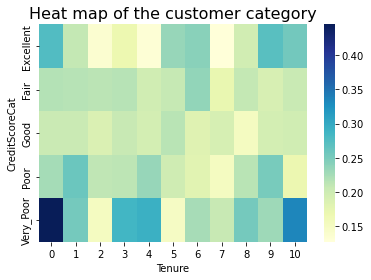

In [100]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"


df = pd.DataFrame({'RowNumber':churn_data.index, 'CreditScore':churn_data['CreditScore'], 'CreditScoreCat':churn_data['CreditScore'].apply(get_credit_score_cat),
                   'Tenure':churn_data['Tenure'], 'Exited':churn_data['Exited']})
table = pd.pivot_table(df,
               index='CreditScoreCat',
               values='Exited',
               columns='Tenure',
               aggfunc = 'mean') 

heatmap = sns.heatmap(data=table, cmap='YlGnBu')
heatmap.set_title('Heat map of the customer category', fontsize=16)

По тепловой диаграмме заметно, что чаще уходят клиенты с рейтингом "Very Poor", особенно в первый год обслуживания в банке.Самы стабильные клиенты имеют кредитный рейтинг "Good", также банку стоит обратить внимание на клиентов с рейтингом "Excellen", поскольку они недовольны услугами банка в первый, девятый и десятый года обслуживания.